In [13]:
imagePath = "T_Sheep_BaseColor.tga"

In [14]:
from perlin_numpy import generate_fractal_noise_2d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import shutil

image = Image.open(imagePath)

In [15]:
def color(h,s,v):
    return np.array([h * (255 / 360), s * (255 / 100), v * (255 / 100)], dtype="uint8")

baseColor = color(30, 80, 40)

In [16]:
def fractalNoise(shift: float):
    noise = generate_fractal_noise_2d((4096, 4096), (8,8), 8)

    #adjustedNosie = np.abs(noise) - 1 + (1 - np.abs(noise)) * (shift + 1)
    adjustedNosie = np.where(noise < 0, - noise - 1 + (1 + noise) * (shift + 1), noise + (1 - noise) * shift)

    return adjustedNosie - shift

In [17]:
coats = [["White", 1, color(30,  10, 70)],
         ["Gray",  1, color(240, 10, 30)],
         ["Black", 1, color(30,  10, 10)],
         ["Brown", 1, color(30,  80, 40)]]

for name, num, baseColor in coats:

    shutil.rmtree(name, ignore_errors=True, onerror=None)
    os.mkdir(name)

    for i in range(num):

        alpha = np.asarray(image)[:,:,3]
        hsv = np.asarray(image.convert("HSV"), dtype="int32")

        hue = hsv[:,:,0]
        saturation = hsv[:,:,1]
        value = hsv[:,:,2]

        furCondition = np.logical_and.reduce([alpha > 0, saturation < 128, value > 96])

        meanHue = hue.mean(where=furCondition)
        meanSaturation = saturation.mean(where=furCondition)
        meanValue = value.mean(where=furCondition)

        valueMask = 1 - np.abs(value - meanValue) / meanValue

        inputColor = np.array([meanHue, meanSaturation, meanValue])

        hueShift = int(baseColor[0] - inputColor[0])
        saturationShift = np.array(valueMask * (baseColor[1] - inputColor[1]), dtype="int32")
        valueShift = int(baseColor[2] - inputColor[2])

        hsv[:,:,0] += hueShift
        hsv[:,:,1] += saturationShift
        hsv[:,:,2] += valueShift

        #saturationNoise = np.array(30 * ((1 + generate_fractal_noise_2d((4096, 4096), (4,4), 8)) / 2 - baseColor[1] / 255), dtype="int32")
        #valueNoise = np.array(70 * ((1 + generate_fractal_noise_2d((4096, 4096), (4,4), 8)) / 2 - baseColor[2] / 255), dtype="int32")
        saturationNoise = np.array(np.log(1 + baseColor[1] / 255) * 255 * fractalNoise(baseColor[1] / 255), dtype="int32")
        valueNoise = np.array(np.log(1 + baseColor[2] / 255) * 255 * fractalNoise(baseColor[2] / 255), dtype="int32")

        hsv[:,:,1] += saturationNoise
        hsv[:,:,2] += valueNoise

        hsv = np.array(hsv.clip(0,255), dtype="uint8")

        red = np.array([0,255,255])

        output = Image.fromarray(hsv, "HSV").convert("RGB")
        a = Image.fromarray(alpha, "L")
        output.putalpha(a)

        output.save(f"{name}/{i}.png")

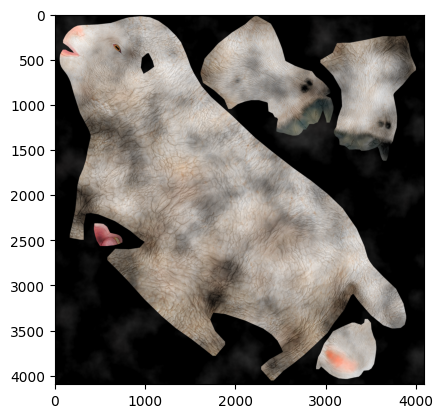

In [26]:
output = Image.open("White/0.png")
plt.imshow(output.convert("RGB"))

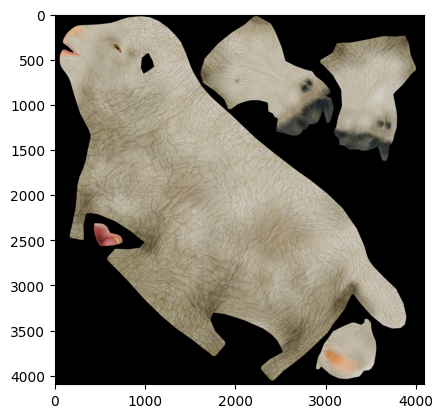

In [21]:
plt.imshow(image.convert("RGB"))

-0.6861194829083782 0.3523352103228467


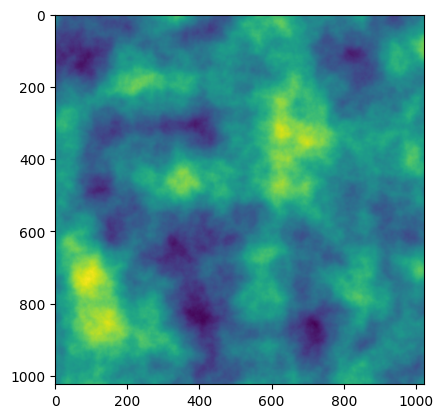

In [16]:
noise = generate_fractal_noise_2d((1024, 1024), (4,4), 8) / 2 - 40/2/100
print(noise.min(), noise.max())
plt.imshow(noise)

-0.11227288293391308 -0.0006541417235679525 1.1014231605735125


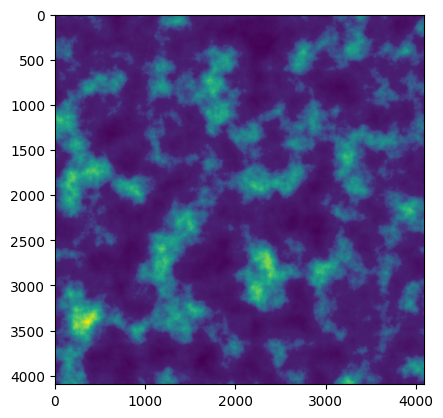

In [17]:
def fractalNoise(shift: float):
    noise = generate_fractal_noise_2d((4096, 4096), (8,8), 8)

    #adjustedNosie = np.abs(noise) - 1 + (1 - np.abs(noise)) * (shift + 1)
    adjustedNosie = np.where(noise < 0, - noise - 1 + (1 + noise) * (shift + 1), noise + (1 - noise) * shift)

    return adjustedNosie - shift

value = 0.1

result = fractalNoise(value)
print(result.min(), np.median(result), result.max())
#plt.hist(result.flat, 100)
plt.imshow(result)
plt.show()